In [15]:
!pip install kaggle

In [16]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [17]:
#API to fecth the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset
#this above link can be extracted from the kaggle website itself

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 86% 140M/163M [00:00<00:00, 209MB/s]
100% 163M/163M [00:00<00:00, 223MB/s]


In [18]:
#to extract the files from zip
from zipfile import ZipFile

dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


Next steps:
1. Import neccasary dependancies
2. Create labels for images
3. Process the images
4. Split into train and test
5. Build a convoluntional neural network
6. Build a predictive system


# **Importing the dependencies**

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow # special feature of google colab
from sklearn.model_selection import train_test_split




In [20]:
# Finding and listing the first 5 and last 5 images of the folder
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_142.jpg', 'with_mask_1998.jpg', 'with_mask_246.jpg', 'with_mask_1455.jpg', 'with_mask_2830.jpg']
['with_mask_568.jpg', 'with_mask_1456.jpg', 'with_mask_2131.jpg', 'with_mask_2843.jpg', 'with_mask_2970.jpg']


In [21]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1813.jpg', 'without_mask_398.jpg', 'without_mask_1344.jpg', 'without_mask_2481.jpg', 'without_mask_3529.jpg']
['without_mask_1266.jpg', 'without_mask_3714.jpg', 'without_mask_3382.jpg', 'without_mask_2201.jpg', 'without_mask_2198.jpg']


In [22]:
#To balance the length of with_mask and without_mask images
print("The number with masked images: ", len(with_mask_files))
print("The number without masked images: ", len(without_mask_files))

The number with masked images:  3725
The number without masked images:  3828


## **Creating labels for the two class of images**  

with mask --> 1 \
without mask --> 0

So for labelling -- 2 lists (one for with_mask (length - 3275) containing ones and other for without_mask (length - 3828) containing zeros)

In [23]:
#For output wherein 1 implies mask and 0 implies without mask

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

labels = with_mask_labels + without_mask_labels
print(len(labels))


7553


## **Displaying the images and proccesing it**

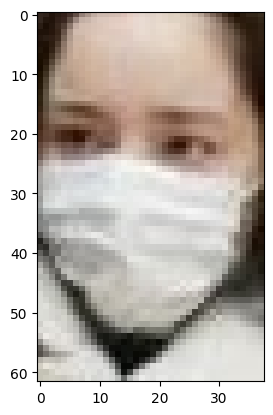

In [24]:
img = mpimg.imread('/content/data/with_mask/with_mask_246.jpg')
imgplot = plt.imshow(img)
plt.show()


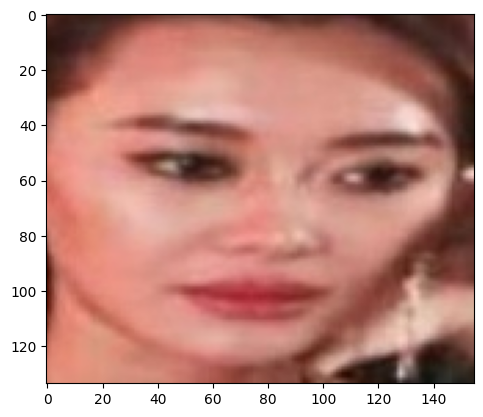

In [25]:
img = mpimg.imread('/content/data/without_mask/without_mask_3714.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image processing**
1. Resizing the images
2. Convert the images to numpy arrays


In [26]:
#Conversion of images to numpy
from PIL import Image
#Image is a function which does image manipulaion

with_mask_path = '/content/data/with_mask/'
data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  data.append(image)


without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  data.append(image)






/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [27]:
#converting the data list to numpy

In [28]:
type(data)

list

In [29]:
print(data[0])

<PIL.Image.Image image mode=RGB size=128x128 at 0x782F0DE4B0D0>


In [30]:
X = np.array(data) #input
Y = np.array(labels) #output

In [31]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


# **Train Test Split**

In [32]:
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [33]:
print(X.shape, X_test.shape, X_train.shape )

(7553, 128, 128, 3) (1511, 128, 128, 3) (6042, 128, 128, 3)


In [34]:
#Scaling process
# here there is a third dimension representing the rgb values
# so the first value is the amount of red and second green and the third is blue each ranging between 0  and 255
# in scaling these values are converted between 0 and 1

X_train_scaled = X_train / 255


X_test_scaled = X_test/ 255


#model performs better if data is scaled


array([[[ 76,  74,  76],
        [ 82,  80,  84],
        [ 75,  74,  79],
        ...,
        [ 45,  41,  45],
        [ 40,  40,  45],
        [ 40,  44,  46]],

       [[ 77,  75,  78],
        [ 83,  82,  85],
        [ 78,  78,  80],
        ...,
        [ 48,  45,  49],
        [ 43,  41,  46],
        [ 43,  43,  46]],

       [[ 76,  75,  78],
        [ 84,  84,  86],
        [ 73,  74,  75],
        ...,
        [ 48,  46,  50],
        [ 46,  45,  50],
        [ 46,  46,  49]],

       ...,

       [[187, 181, 183],
        [182, 176, 178],
        [172, 166, 169],
        ...,
        [ 29,  29,  31],
        [ 31,  32,  34],
        [ 32,  32,  35]],

       [[176, 168, 171],
        [175, 169, 173],
        [166, 161, 165],
        ...,
        [ 32,  32,  33],
        [ 31,  31,  35],
        [ 31,  31,  34]],

       [[158, 149, 153],
        [159, 153, 157],
        [161, 156, 160],
        ...,
        [ 34,  34,  34],
        [ 33,  33,  36],
        [ 32,  33,  35]]], dtype=uint8)
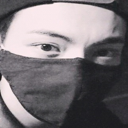

In [35]:
X_train[0]

In [36]:

print(X_train_scaled.shape)
print(Y_train.shape)

(6042, 128, 128, 3)
(6042,)


# **Building a Convolutional Neural Network (CNN)**

In [37]:
import tensorflow as tf
from tensorflow import keras


In [38]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size =(3,3), activation = 'relu', input_shape = (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

#Second layer
model.add(keras.layers.Conv2D(64, kernel_size =(3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

#Flatten layer
model.add(keras.layers.Flatten())

#Two Dense layers
model.add(keras.layers.Dense(128, activation = 'relu')) #here 128 (always 2^n) neurons are for the start
model.add(keras.layers.Dropout(0.5)) #To overcome overfitting some nuerons get switched off

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

#sigmoid - mostly used for binary differentiation
#Softmax - mostly used for multiclass classification

#Final output layer
model.add(keras.layers.Dense(num_of_classes, activation = 'sigmoid'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
#Compiling the nueral network seting up the loss function and optimistaion algorithm for the neural netowrk
model.compile( optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [40]:
#Training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split = 0.1, epochs = 5)


Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - acc: 0.7063 - loss: 0.5907 - val_acc: 0.8694 - val_loss: 0.2899
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.8903 - loss: 0.2838 - val_acc: 0.8909 - val_loss: 0.2501
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9226 - loss: 0.2066 - val_acc: 0.8926 - val_loss: 0.2483
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9336 - loss: 0.1701 - val_acc: 0.9190 - val_loss: 0.2030
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9507 - loss: 0.1363 - val_acc: 0.9174 - val_loss: 0.2256


# **Model Evaluation**

In [41]:
loss, accuracy = model.evaluate(X_test_scaled,Y_test)
print('Test Accuracy = ', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.9276 - loss: 0.1811
Test Accuracy =  0.9225678443908691


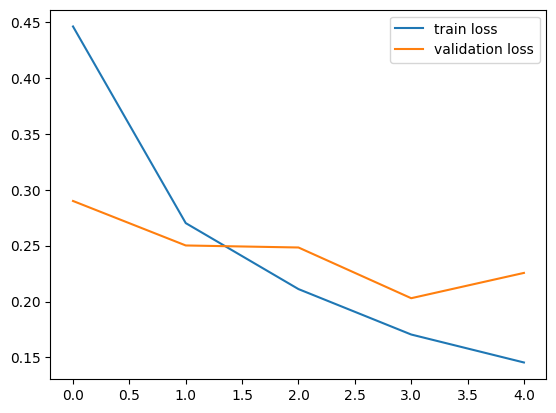

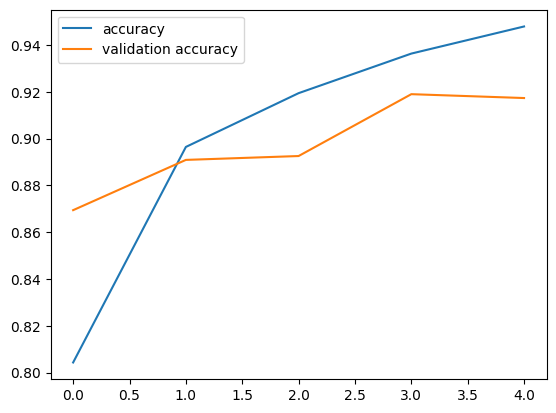

In [42]:
h = history

plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'], label = 'accuracy')
plt.plot(h.history['val_acc'], label = 'validation accuracy')
plt.legend()
plt.show()

# **Building predictive system**

In [43]:
!pip install opencv-python

path of the image to be predicted: /content/maskImage.jpeg


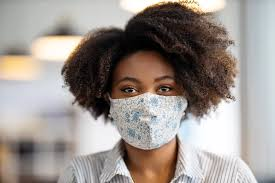

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.3224674  0.62148446]]
1
Mask


In [45]:
input_image_path = input('path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
  print('Mask')
else:
  print('No Mask')